# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7f840c4b2be0>)

In [4]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [5]:
import pandas as pd
data = pd.read_csv('Fremont.csv', parse_dates=True)
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [6]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

In [7]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [8]:
%matplotlib inline

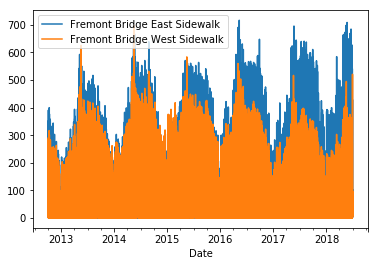

In [9]:
data.plot()

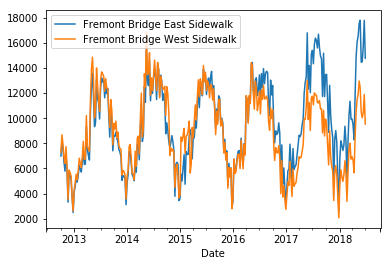

In [10]:
data.resample('W').sum().plot();

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

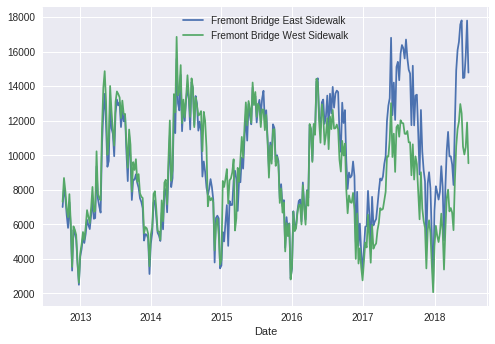

In [12]:
data.resample('W').sum().plot();
data.columns = ['West', 'East']

(0, 618365.35)

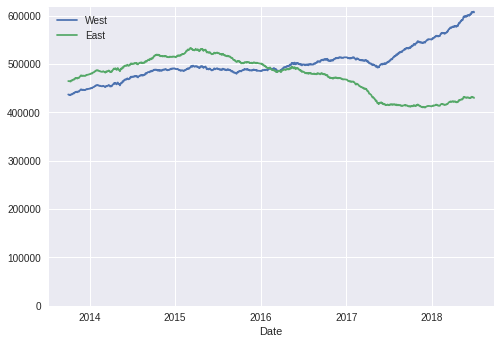

In [13]:
# Lets look at yearly trend by changing from weekly to Daily and do rolling window of 365
ax = data.resample('D').sum().rolling(365).sum().plot();
# Lets take the exes to 0 to better see what really happening
ax.set_ylim(0, None)


(0, 1071703.9)

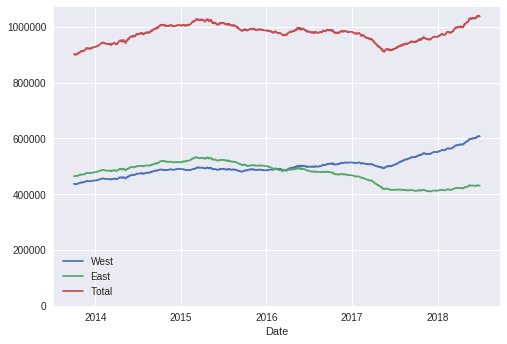

In [14]:
# Another thing we could do is add the total to see how the total number of bikes per year vary
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

Another thing we could do is take a closer look at the daily trend by hour and see if there is any pattern

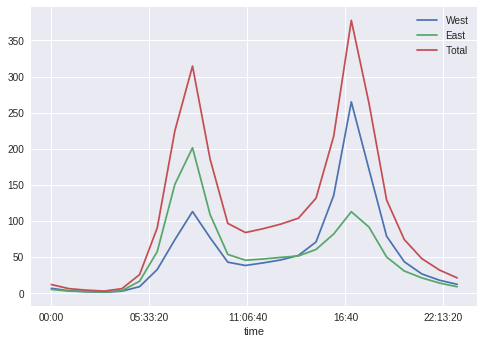

In [15]:
data.groupby(data.index.time).mean().plot()

In [16]:
# Pivot the data to see whats 
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [17]:
pivoted.iloc[:5, -5:]
# giving us the day on the coloumns and hour of the day on the rows

,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
00:00:00,21.0,11.0,11.0,9.0,45.0
01:00:00,2.0,3.0,1.0,6.0,17.0
02:00:00,3.0,3.0,1.0,6.0,6.0
03:00:00,2.0,5.0,4.0,4.0,6.0
04:00:00,13.0,22.0,10.0,11.0,5.0


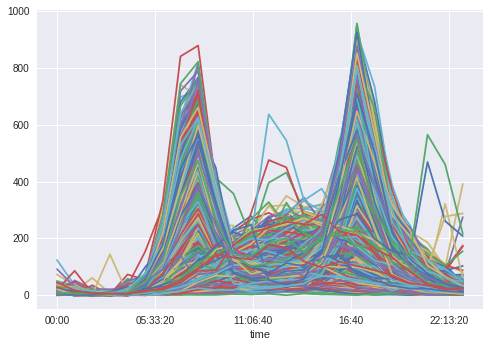

In [18]:
pivoted.plot(legend=False)
# each line correspond to a day. It hard to see here so am gonna add some transparency 

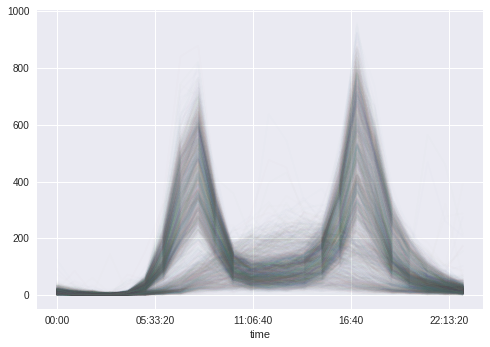

In [19]:
pivoted.plot(legend=False, alpha=0.01)

We can see that some days have commute patterns with bimodal plots, these seemed to be weekdays kind of patters. We can also se some other patterns that peaks around midday, those am thinking are like weekend or holiday days. We can take closer look to verify these observations.